In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter
import pandas as pd

In [2]:
bali = pd.read_csv('bali_min4.csv')
jabar = pd.read_csv('jawabarat_min4.csv')
# df = pd.concat([bali, jabar], axis=0)
jatengjatim = pd.read_csv('jatengjatim_min4.csv')
# df = pd.concat([bali, jatengjatim], axis=0)
# df = pd.concat([jabar, jatengjatim], axis=0)
df = pd.concat([bali, jabar, jatengjatim], axis=0)
# df = pd.read_csv('southern_california_min25.csv')
df['timestamp'] = pd.to_datetime(df['time'], errors='coerce', utc=False)
df['Datetime'] = df['timestamp']
df.set_index('timestamp', inplace=True)
df = df.sort_index(ascending=True)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Datetime
timestamp,,,,,,,,,,,,,,,,,,,,,
1995-01-01 02:02:25.490000+00:00,1995-01-01T02:02:25.490Z,-10.9270,113.0110,18.90,4.5,mb,NaN,NaN,NaN,1.20,...,"294 km S of Kencong, Indonesia",earthquake,NaN,8.5,NaN,4.0,reviewed,us,us,1995-01-01 02:02:25.490000+00:00
1995-01-07 15:02:59.810000+00:00,1995-01-07T15:02:59.810Z,-9.0250,110.7550,114.80,4.7,mb,NaN,NaN,NaN,0.80,...,"126 km SSE of Pundong, Indonesia",earthquake,NaN,21.5,NaN,12.0,reviewed,us,us,1995-01-07 15:02:59.810000+00:00
1995-01-07 18:37:28.920000+00:00,1995-01-07T18:37:28.920Z,-9.2310,117.1110,33.00,4.2,mb,NaN,NaN,NaN,0.90,...,"88 km SSW of Sumbawa Besar, Indonesia",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us,1995-01-07 18:37:28.920000+00:00
1995-01-19 09:19:57.180000+00:00,1995-01-19T09:19:57.180Z,-10.7640,117.1200,33.00,4.9,mb,NaN,NaN,NaN,1.30,...,"246 km SSE of Praya, Indonesia",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us,1995-01-19 09:19:57.180000+00:00
1995-02-16 16:27:25.400000+00:00,1995-02-16T16:27:25.400Z,-10.0560,113.8580,33.00,4.0,mb,NaN,NaN,NaN,0.40,...,"186 km S of Gambiran Satu, Indonesia",earthquake,NaN,NaN,NaN,5.0,reviewed,us,us,1995-02-16 16:27:25.400000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 15:16:45.796000+00:00,2020-12-20T15:16:45.796Z,-9.2506,110.8510,35.00,4.2,mb,NaN,148.0,1.368,0.58,...,"153 km SSE of Pundong, Indonesia",earthquake,8.9,1.9,0.186,8.0,reviewed,us,us,2020-12-20 15:16:45.796000+00:00
2020-12-20 15:53:57.395000+00:00,2020-12-20T15:53:57.395Z,-9.2936,112.1503,35.00,4.3,mb,NaN,53.0,2.114,0.90,...,"130 km SSW of Sumberpucung, Indonesia",earthquake,5.3,2.0,0.142,14.0,reviewed,us,us,2020-12-20 15:53:57.395000+00:00
2020-12-22 03:27:21.031000+00:00,2020-12-22T03:27:21.031Z,-9.5505,112.5698,35.00,4.1,mb,NaN,120.0,1.896,0.94,...,"149 km S of Dampit, Indonesia",earthquake,5.6,1.9,0.175,9.0,reviewed,us,us,2020-12-22 03:27:21.031000+00:00


In [3]:
df = df[['depth', 'mag']]
df

,depth,mag
timestamp,,
1995-01-01 02:02:25.490000+00:00,18.90,4.5
1995-01-07 15:02:59.810000+00:00,114.80,4.7
1995-01-07 18:37:28.920000+00:00,33.00,4.2
1995-01-19 09:19:57.180000+00:00,33.00,4.9
1995-02-16 16:27:25.400000+00:00,33.00,4.0
...,...,...
2020-12-20 15:16:45.796000+00:00,35.00,4.2
2020-12-20 15:53:57.395000+00:00,35.00,4.3
2020-12-22 03:27:21.031000+00:00,35.00,4.1


In [4]:
print(df.isna().sum())

depth    0
mag      0
dtype: int64


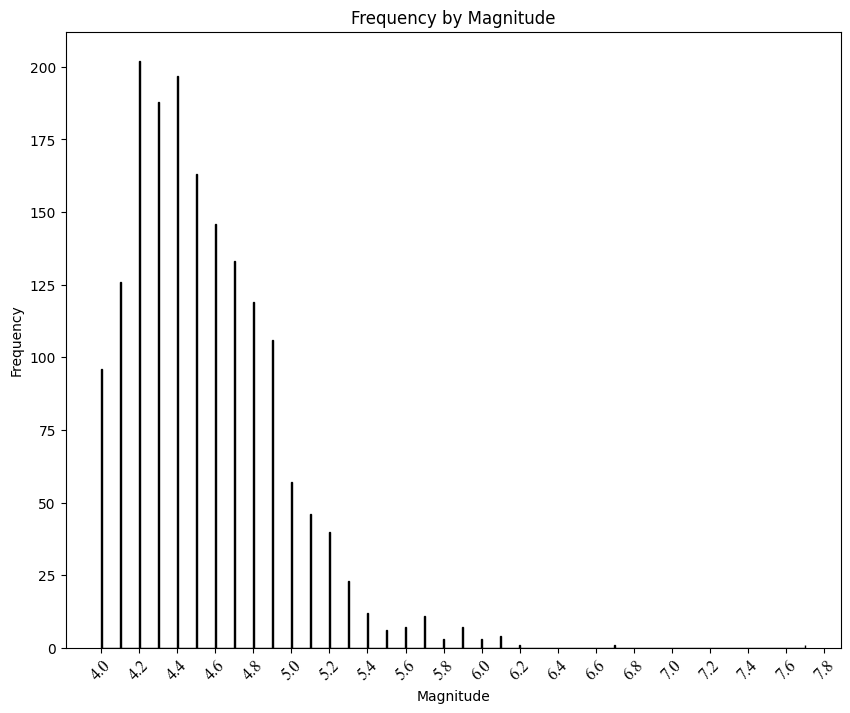

In [5]:
mag_unique, frequency = np.unique(df['mag'], return_counts=True)

plt.figure(figsize=(10,8))
plt.hist(df['mag'], bins=1000, color='black', edgecolor='black')

bins = [0, 20, 40, 60]

from matplotlib.ticker import MultipleLocator
# Set x-axis scale to increment by 0.5
plt.gca().xaxis.set_major_locator(MultipleLocator(0.2))
# Add titles and labels
plt.title('Frequency by Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.xticks(fontsize=12, fontname='Times New Roman', rotation=45)

# Show the plot
plt.show()

In [6]:
mag_filter = 4.5
depth_filter = 100
resample_rate = '1M'

In [7]:
# def occurence_criterion(raw_array):
#     print(raw_array)
#     print("---------------------")
#     target = -1
#     if len(raw_array) > 0:
#         if raw_array['earthquake'].eq(1).any():
#             target = 1
#         if raw_array['earthquake'].eq(0).any():
#             target = 0
#     if len(raw_array) == 0:
#         target = 0

        
#     return target

# earthquake_occurence = df.resample(resample_rate).apply(occurence_criterion)

# earthquake_occurence = earthquake_occurence.to_frame(name='earthquake')

# earthquake_occurence = earthquake_occurence.sort_index(ascending=True)
# earthquake_occurence['earthquake'].value_counts()

In [8]:
# Initialize the 'ED' column with NaN values
df['ED'] = np.nan

# Filter the dataframe for earthquakes with magnitude greater than mag_filter
filtered_df = df[df['mag'] > mag_filter]

n = 50

# Calculate the elapsed days for the last n earthquake events
for i in range(n, len(filtered_df)):
    current_time = filtered_df.index[i]
    past_time = filtered_df.index[i-n]
    elapsed_days = (current_time - past_time).days
    df.loc[current_time, 'ED'] = elapsed_days

# Fill NaN values in 'ED' column
for i in range(len(df)):
    if pd.isna(df.iloc[i]['ED']):
        # Find the latest valid 'ED' value before the current index
        last_valid_index = df.iloc[:i]['ED'].last_valid_index()
        if last_valid_index is not None:
            time_since_last_valid = (df.index[i] - last_valid_index).days
            df.at[df.index[i], 'ED'] = df.at[last_valid_index, 'ED'] + time_since_last_valid

# df = df.dropna(subset=['ED'])
df

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\388928700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ED'] = np.nan


,depth,mag,ED
timestamp,,,
1995-01-01 02:02:25.490000+00:00,18.90,4.5,NaN
1995-01-07 15:02:59.810000+00:00,114.80,4.7,NaN
1995-01-07 18:37:28.920000+00:00,33.00,4.2,NaN
1995-01-19 09:19:57.180000+00:00,33.00,4.9,NaN
1995-02-16 16:27:25.400000+00:00,33.00,4.0,NaN
...,...,...,...
2020-12-20 15:16:45.796000+00:00,35.00,4.2,875.0
2020-12-20 15:53:57.395000+00:00,35.00,4.3,875.0
2020-12-22 03:27:21.031000+00:00,35.00,4.1,876.0


In [9]:

# Initialize the 'energy_squared' and 'cumulative_energy_squared' columns with NaN values
df['energy_squared_root'] = np.nan
df['cumulative_energy_squared'] = np.nan

df['energy'] = 10**(11.8+1.5*df['mag'])

# Calculate the energy squared for each data point
df['energy_squared_root'] = np.sqrt(df['energy'])

# Calculate the cumulative sum of energy squared for the last 50 data points
# for i in range(n, len(df)):
#     df.iloc[i, df.columns.get_loc('cumulative_energy_squared')] = df.iloc[i-n:i]['energy_squared_root'].sum()

df['cumulative_energy_squared'] = df['energy_squared_root'].rolling(n).sum()

# Calculate the RSRER
df['RSRER'] = df['cumulative_energy_squared'] / df['ED']

df['mean_mag'] = df['mag'].rolling(n).mean()
df['min_mag'] = df['mag'].rolling(n).min()
df['b_value'] = np.log10(np.e)/(df['mean_mag'] - df['min_mag'])

df['event_counts'] = df['mag'].rolling(n).apply(lambda x: (x > mag_filter).sum(), raw=True)
df['a_value'] = (np.log10(df['event_counts']) + df['b_value']*df['min_mag'])/n
# df['MSD'] = np.sum((np.log10(df['event_counts'])-(df['a_value']-(df['b_value']*df['mag'])))**2)/(n-1)
df['max_mag'] = df['mag'].rolling(n).max()
df['MD'] = df['a_value']/df['b_value'] - df['max_mag']
# print(df['event_counts'])

df 

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\2738765218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_squared_root'] = np.nan
C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\2738765218.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cumulative_energy_squared'] = np.nan
C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\2738765218.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,depth,mag,ED,energy_squared_root,cumulative_energy_squared,energy,RSRER,mean_mag,min_mag,b_value,event_counts,a_value,max_mag,MD
timestamp,,,,,,,,,,,,,,
1995-01-01 02:02:25.490000+00:00,18.90,4.5,NaN,1.883649e+09,NaN,3.548134e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-07 15:02:59.810000+00:00,114.80,4.7,NaN,2.660725e+09,NaN,7.079458e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-07 18:37:28.920000+00:00,33.00,4.2,NaN,1.122018e+09,NaN,1.258925e+18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-19 09:19:57.180000+00:00,33.00,4.9,NaN,3.758374e+09,NaN,1.412538e+19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-02-16 16:27:25.400000+00:00,33.00,4.0,NaN,7.943282e+08,NaN,6.309573e+17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-20 15:16:45.796000+00:00,35.00,4.2,875.0,1.122018e+09,9.353097e+10,1.258925e+18,1.068925e+08,4.430,4.0,1.009987,13.0,0.103078,5.2,-5.097941
2020-12-20 15:53:57.395000+00:00,35.00,4.3,875.0,1.333521e+09,9.353097e+10,1.778279e+18,1.068925e+08,4.430,4.0,1.009987,13.0,0.103078,5.2,-5.097941
2020-12-22 03:27:21.031000+00:00,35.00,4.1,876.0,9.440609e+08,9.259138e+10,8.912509e+17,1.056979e+08,4.422,4.0,1.029134,13.0,0.104610,5.2,-5.098352


In [10]:
# Drop the intermediate columns
df.drop(columns=['energy_squared_root', 'cumulative_energy_squared', 'mean_mag', 'min_mag', 'event_counts', 'a_value', 'max_mag'], inplace=True)

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\1093842324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['energy_squared_root', 'cumulative_energy_squared', 'mean_mag', 'min_mag', 'event_counts', 'a_value', 'max_mag'], inplace=True)


In [11]:
df.dropna(subset=['RSRER'], inplace=True)
df.isna().sum()

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\2534608267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['RSRER'], inplace=True)


depth      0
mag        0
ED         0
energy     0
RSRER      0
b_value    0
MD         0
dtype: int64

In [12]:
df['earthquake'] = np.where((df['mag'] > mag_filter) & (df['depth'] < depth_filter), 1,  0) 

df['earthquake'].value_counts()

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\3861059285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['earthquake'] = np.where((df['mag'] > mag_filter) & (df['depth'] < depth_filter), 1,  0)


earthquake
0    848
1    673
Name: count, dtype: int64

In [15]:
def occurence_criterion(raw_array):
    # print(raw_array)
    # print("---------------------")
    target = 0
    if len(raw_array) > 0:
        if raw_array['earthquake'].eq(1).any():
            target = 1
        if raw_array['earthquake'].eq(0).all():
            target = 0
    # if len(raw_array) == 0:
    #     target = 0

        
    return target


earthquake_occurence = df[['earthquake']].resample(resample_rate).apply(occurence_criterion)
monthly_df = df.resample(resample_rate).mean()
# monthly_df = monthly_df.fillna(0)
monthly_df = monthly_df.dropna()
monthly_df['earthquake'] = earthquake_occurence
monthly_df['not_earthquake'] = np.where(monthly_df['earthquake'] == 0, 1, 0)
print(monthly_df['earthquake'].value_counts())
print(monthly_df['not_earthquake'].value_counts())
print(monthly_df)

earthquake
1    189
0     47
Name: count, dtype: int64
not_earthquake
0    189
1     47
Name: count, dtype: int64
                               depth       mag           ED        energy  \
timestamp                                                                   
2000-06-30 00:00:00+00:00  42.400000  4.466667  1976.333333  3.760890e+18   
2000-07-31 00:00:00+00:00  61.000000  4.300000  1911.666667  2.473703e+18   
2000-08-31 00:00:00+00:00  69.166667  4.733333  1802.666667  8.052972e+18   
2000-09-30 00:00:00+00:00  33.000000  4.800000  1720.000000  1.000000e+19   
2000-10-31 00:00:00+00:00  33.000000  4.400000  1708.666667  5.511537e+18   
...                              ...       ...          ...           ...   
2020-07-31 00:00:00+00:00  41.480000  4.475000   793.250000  4.512269e+18   
2020-08-31 00:00:00+00:00  29.616667  4.683333   769.500000  1.302972e+19   
2020-09-30 00:00:00+00:00  38.920000  4.500000   783.250000  5.029166e+18   
2020-10-31 00:00:00+00:00  39.796667  4

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\4258576481.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  earthquake_occurence = df[['earthquake']].resample(resample_rate).apply(occurence_criterion)
C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\4258576481.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df = df.resample(resample_rate).mean()


In [16]:
df = monthly_df[['depth', 'mag', 'ED', 'RSRER', 'b_value', 'MD', 'earthquake', 'not_earthquake']]
# df = monthly_df[['mag', 'ED','MD', 'earthquake']]
df

,depth,mag,ED,RSRER,b_value,MD,earthquake,not_earthquake
timestamp,,,,,,,,
2000-06-30 00:00:00+00:00,42.400000,4.466667,1976.333333,6.731465e+07,0.787837,-5.686084,1,0
2000-07-31 00:00:00+00:00,61.000000,4.300000,1911.666667,6.605044e+07,0.806484,-5.686699,1,0
2000-08-31 00:00:00+00:00,69.166667,4.733333,1802.666667,6.976356e+07,0.789647,-5.685196,1,0
2000-09-30 00:00:00+00:00,33.000000,4.800000,1720.000000,7.443554e+07,0.770026,-5.683691,1,0
2000-10-31 00:00:00+00:00,33.000000,4.400000,1708.666667,7.245997e+07,0.802452,-5.685743,1,0
...,...,...,...,...,...,...,...,...
2020-07-31 00:00:00+00:00,41.480000,4.475000,793.250000,1.226671e+08,0.959921,-4.870344,1,0
2020-08-31 00:00:00+00:00,29.616667,4.683333,769.500000,1.229447e+08,0.996355,-4.929817,1,0
2020-09-30 00:00:00+00:00,38.920000,4.500000,783.250000,1.258752e+08,0.961991,-5.095252,1,0


In [17]:
correlation_matrix = df.corr()
correlation_matrix

,depth,mag,ED,RSRER,b_value,MD,earthquake,not_earthquake
depth,1.000000,-0.198931,0.167325,-0.256542,0.237642,-0.001971,-0.237962,0.237962
mag,-0.198931,1.000000,0.052948,0.059047,-0.261769,-0.187194,0.536719,-0.536719
ED,0.167325,0.052948,1.000000,-0.368020,-0.178110,-0.137300,-0.074258,0.074258
RSRER,-0.256542,0.059047,-0.368020,1.000000,-0.158173,0.000729,0.076379,-0.076379
b_value,0.237642,-0.261769,-0.178110,-0.158173,1.000000,0.568635,-0.102987,0.102987
MD,-0.001971,-0.187194,-0.137300,0.000729,0.568635,1.000000,-0.063872,0.063872
earthquake,-0.237962,0.536719,-0.074258,0.076379,-0.102987,-0.063872,1.000000,-1.000000
not_earthquake,0.237962,-0.536719,0.074258,-0.076379,0.102987,0.063872,-1.000000,1.000000


In [18]:
# Replace infinite values with a large number
df.replace([np.inf, -np.inf], 1e10, inplace=True)

C:\Users\SteinSteffi1\AppData\Local\Temp\ipykernel_14908\2297783001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace([np.inf, -np.inf], 1e10, inplace=True)


In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with the desired feature range
scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply the scaler to the first 6 columns of the dataframe
df.iloc[:, :6] = scaler.fit_transform(df.iloc[:, :6])

# Display the dataframe
df

,depth,mag,ED,RSRER,b_value,MD,earthquake,not_earthquake
timestamp,,,,,,,,
2000-06-30 00:00:00+00:00,-0.227099,-0.333333,1.000000,-0.999711,-0.626768,0.008768,1,0
2000-07-31 00:00:00+00:00,0.216603,-0.571429,0.933845,-0.999965,-0.583338,0.008078,1,0
2000-08-31 00:00:00+00:00,0.411419,0.047619,0.822337,-0.999218,-0.622552,0.009764,1,0
2000-09-30 00:00:00+00:00,-0.451336,0.142857,0.737768,-0.998277,-0.668254,0.011452,1,0
2000-10-31 00:00:00+00:00,-0.451336,-0.428571,0.726174,-0.998675,-0.592727,0.009150,1,0
...,...,...,...,...,...,...,...,...
2020-07-31 00:00:00+00:00,-0.249046,-0.321429,-0.210307,-0.988567,-0.225960,0.923755,1,0
2020-08-31 00:00:00+00:00,-0.532045,-0.023810,-0.234604,-0.988511,-0.141100,0.857046,1,0
2020-09-30 00:00:00+00:00,-0.310115,-0.285714,-0.220537,-0.987921,-0.221140,0.671483,1,0


In [21]:
import numpy as np

def create_lstm_dataset(df, lookback, n_future):
    """
    Creates an LSTM dataset from the given DataFrame.

    Parameters:
    - df: pandas DataFrame containing features.
    - lookback: Number of past timesteps to include in each X sample.

    Returns:
    - X: 3D NumPy array of shape (samples, lookback, features)
    - Y: 1D NumPy array of shape (samples,)
    """
    data = df.values  # Convert dataframe to NumPy array
    X, Y = [], []
    
    for i in range(len(data) - lookback -n_future + 1):
        X.append(data[i:i + lookback, :-2])  # First 6 columns
        Y.append(data[(i + lookback):(i + lookback + n_future), -2])     # 7th column as label
    
    return np.array(X), np.array(Y)
look_back = 10
X, Y = create_lstm_dataset(df, lookback=look_back, n_future=1)

print(X.shape)  # (number of samples, lookback, 6)
print(Y.shape)  # (number of samples,)


(226, 10, 6)
(226, 1)


In [19]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.15, shuffle=False)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("Y_train shape:", Y_train.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (192, 10, 7)
X_val shape: (34, 10, 7)
Y_train shape: (192, 1)
Y_val shape: (34, 1)


In [20]:
print(X_train[0])

[[-0.22709924 -0.33333333  1.         -0.99971071 -0.626768    0.00876778
   1.        ]
 [ 0.21660305 -0.57142857  0.93384529 -0.99996523 -0.58333759  0.00807799
   1.        ]
 [ 0.41141858  0.04761905  0.8223371  -0.99921768 -0.62255228  0.00976367
   1.        ]
 [-0.45133588  0.14285714  0.7377682  -0.99827708 -0.66825388  0.01145205
   1.        ]
 [-0.45133588 -0.42857143  0.72617408 -0.99867482 -0.59272713  0.00915024
   1.        ]
 [-0.45133588  0.28571429  0.72446906 -0.99843987 -0.61588885  0.01029669
   1.        ]
 [-0.45133588 -0.85714286  0.73060712 -0.99860222 -0.58854266  0.00971901
   0.        ]
 [-0.45133588  0.92857143  0.64160517 -0.99669609 -0.66744161  0.01170545
   1.        ]
 [-0.45133588  0.07142857  0.60886882 -0.99553842 -0.7530622   0.01473832
   1.        ]
 [-0.45133588  0.10714286  0.6063113  -0.99504083 -0.78836512  0.01603344
   1.        ]]


In [21]:
# Count occurrences of 0 and 1 in Y_train
unique_train, counts_train = np.unique(Y_train, return_counts=True)
print("Y_train counts:", dict(zip(unique_train, counts_train)))

# Count occurrences of 0 and 1 in Y_val
unique_val, counts_val = np.unique(Y_val, return_counts=True)
print("Y_val counts:", dict(zip(unique_val, counts_val)))

Y_train counts: {0.0: 39, 1.0: 153}
Y_val counts: {0.0: 7, 1.0: 27}


In [22]:
# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# mean squared error (mse) for regression  (only for Keras tensors)
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [23]:
# import tensorflow as tf
# from tensorflow.keras.layers import *
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

# from tensorflow.keras.optimizers.legacy import Adam

# from tensorflow.keras.regularizers import L1L2
# from tensorflow.keras.layers import Layer, Dense, Dot, Activation

# from tensorflow.keras.callbacks import Callback, EarlyStopping

# from tensorflow.keras import backend as K

# from matplotlib import pyplot as plt

# K.clear_session()

   
# l1 = 0.0001
# l2 = 0.0001

# lstm_dropout = 0.2
# recurrent_dropout = 0.1
# dense_dropout = 0.2
# loss = 'mse'

# n_target = Y_train.shape[-2:]

# regularization_criteria = L1L2(l1=l1, l2=l2)

# n_target_y = Y_train.shape[-1]

# def build_model(input_shape):
#     input_layer = Input(shape=input_shape, name='Input_1')
#     sequence = input_layer
#     sequence = LSTM(20, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
#     sequence = Flatten()(sequence)
#     # sequence = Dropout(dense_dropout)(sequence)
#     # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
#     # sequence = Dense(4, activation = 'tanh', name='Dense_3')(sequence)
#     sequence = Dense(n_target_y, activation = 'tanh', name='Dense_4')(sequence)
#     output_layer = sequence

#     model = Model(inputs=input_layer, outputs=output_layer)

#     return model

# input_shape = (look_back, X_train.shape[2])

# learning_rate = 0.0005

# optimizer = Adam(learning_rate=learning_rate)

# model = build_model(input_shape)
# model.compile(optimizer=optimizer, loss=loss, metrics=[mse, rmse, r_square])
# model.summary()

# import time

# start_time = time.time()

# # early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# history = model.fit(X_train, Y_train, epochs=700, batch_size=64, validation_data=(X_val, Y_val),
#                     # callbacks=[early_stopping]
#                     )

# end_time = time.time()
# difference_in_seconds = end_time - start_time
# print(f"The difference in seconds is: {difference_in_seconds}")


In [24]:
# import keras_tuner as kt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Flatten

# def build_model(hp):
#     model = keras.Sequential()
    
#     model.add(LSTM(units=hp.Int('lstm_units', min_value=16, max_value=128, step=16),
#                    return_sequences=True,
#                      input_shape=(look_back, X_train.shape[2])))
    
#     # model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
#     # model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_units', min_value=4, max_value=16, step=4),
#     #                              return_sequences=True)))
    
#     # model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_units', min_value=4, max_value=32, step=4),
#     #                              return_sequences=True)))
    
#     model.add(Flatten())
    
#     model.add(Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)))
    
#     model.add(Dense(hp.Float('dense_units', min_value=0, max_value=32, step=8), activation='tanh'))
    
#     model.add(Dense(1, activation='tanh'))
    
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-5])),
#                     loss='mse',
#                     metrics=[rmse, r_square])
    
#     return model

In [25]:
# import keras_tuner as kt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Flatten, Attention, Input
# from tensorflow.keras.models import Model

# def build_model(hp):
#     inputs = Input(shape=(look_back, X_train.shape[2]))
    
#     lstm_out = LSTM(units=60,
#                     return_sequences=True)(inputs)

    
#     flatten = Flatten()(lstm_out)
    
#     dropout = Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1))(flatten)
    
#     dense = Dense(hp.Int('dense_units', min_value=0, max_value=32, step=4), activation='tanh')(dropout)
    
#     output = Dense(1, activation='tanh')(dense)
    
#     model = Model(inputs=inputs, outputs=output)
    
#     model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-4, 1e-5])),
#                   loss='mse',
#                   metrics=[rmse, r_square])
    
#     return model


In [26]:
# tuner = kt.RandomSearch(build_model,
#                         objective=kt.Objective("val_r_square", direction="max"),
#                         max_trials=20,
#                         executions_per_trial=2,
#                         directory='my_dir',
#                         project_name='earthquake')

In [27]:
# tuner.search(X_train, Y_train, epochs=150, validation_data=(X_val, Y_val))

In [28]:
# from tensorflow.keras.callbacks import Callback, EarlyStopping
# best_hps = tuner.get_best_hyperparameters(num_trials=5)[0]

# # print(f"Best LSTM units: {best_hps.get('lstm_units')}")
# # print(f"Best BiLSTM usage: {best_hps.get('bidirectional_units')}")
# print(f"Best Dropout Rate: {best_hps.get('dropout')}")
# print(f"Best Dense Units: {best_hps.get('dense_units')}")
# print(f"Best Learning Rate: {best_hps.get('learning_rate')}")

# # Train the best model
# best_model = tuner.hypermodel.build(best_hps)
# early_stopping = EarlyStopping(monitor='val_loss', patience=700, restore_best_weights=True)
# history = best_model.fit(X_train, Y_train, epochs=1000, validation_data=(X_val, Y_val), callbacks=[early_stopping])


In [29]:
# # Generate predictions for the training set
# Y_train_pred = best_model.predict(X_train)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_train, label='True Values', color='blue',  marker='o')
# plt.plot(Y_train_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Training True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [30]:
# # Generate predictions for the validation set
# Y_val_pred = best_model.predict(X_val)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_val, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [31]:
# # Generate predictions for the validation set
# Y_val_pred = best_model.predict(X_val)
# Y_val_pred = np.where(Y_val_pred > 0.5, 1,np.where(Y_val_pred<-0.5, -1, 0) )

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_val, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [32]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(Y_val.flatten(), Y_val_pred.flatten())

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

In [33]:
# # Calculate total accuracy
# total_accuracy = np.sum(Y_val.flatten() == Y_val_pred.flatten()) / len(Y_val)
# print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

In [34]:
# Create a mask to filter out values in Y_test that are not equal to 0
mask = Y_val != 0
# print(X_test.shape)
# Apply the mask to filter X_test and Y_test
X_test_filtered = np.array([x for x, m in zip(X_val, mask) if m])
Y_test_filtered = Y_val[mask]

# Print the shapes of the filtered arrays to verify
print(X_test_filtered.shape)
print(Y_test_filtered.shape)

(27, 10, 7)
(27,)


In [35]:
# # Generate predictions for the validation set
# Y_val_pred = best_model.predict(X_test_filtered)
# Y_val_pred = np.where(Y_val_pred > 0.15, 1, -1)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_test_filtered, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [36]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(Y_test_filtered.flatten(), Y_val_pred.flatten())

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

In [37]:
# # Calculate total accuracy
# total_accuracy = np.sum(Y_test_filtered.flatten() == Y_val_pred.flatten()) / len(Y_test_filtered)
# print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

In [38]:
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Layer, Dropout

from tensorflow.keras.optimizers.legacy import Adam

from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers import Layer, Dense, Dot, Activation

from tensorflow.keras.callbacks import Callback, EarlyStopping

from tensorflow.keras import backend as K

from matplotlib import pyplot as plt

K.clear_session()

METRICS = [
    mse,
    tf.keras.metrics.BinaryCrossentropy(name='binary_crossentropy', from_logits=False),
    tf.keras.metrics.BinaryAccuracy(name='accuracy', threshold=0.5),
]
   
l1 = 0.0
l2 = 0.0

lstm_dropout = 0.0
recurrent_dropout = 0.0
dense_dropout = 0.1
loss = 'mse'

n_target = Y_train.shape[-2:]

regularization_criteria = L1L2(l1=l1, l2=l2)

n_target_y = Y_train.shape[-1]

def build_model(input_shape):
    input_layer = Input(shape=input_shape, name='Input_1')
    sequence = input_layer
    sequence = LSTM(70, return_sequences = True,  name="LSTM-1", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(input_layer)
    
    sequence = Flatten()(sequence)
    sequence = Dense(20, activation = 'tanh', name='Dense_2')(sequence)
    sequence = Dropout(0.3)(sequence)
    # sequence = LSTM(16, return_sequences = False,  name="LSTM-2", kernel_regularizer = regularization_criteria, dropout=lstm_dropout, recurrent_dropout=recurrent_dropout)(sequence)
    sequence = Dense(10, activation = 'tanh', name='Dense_3')(sequence)
    sequence = Dense(n_target_y, activation = 'sigmoid', name='Dense_4')(sequence)
    output_layer = sequence

    model = Model(inputs=input_layer, outputs=output_layer)

    return model

input_shape = (look_back, X_train.shape[2])

learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model = build_model(input_shape)
model.compile(optimizer=optimizer, loss=loss, metrics=[METRICS])
model.summary()

import time

start_time = time.time()

early_stopping = EarlyStopping(monitor='val_loss', patience=700, restore_best_weights=True)

history = model.fit(X_train, Y_train, epochs=1000, batch_size=64, validation_data=(X_val, Y_val),
                    callbacks=[early_stopping]
                    )

end_time = time.time()
difference_in_seconds = end_time - start_time
print(f"The difference in seconds is: {difference_in_seconds}")


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_1 (InputLayer)        [(None, 10, 7)]           0         
                                                                 
 LSTM-1 (LSTM)               (None, 10, 70)            21840     
                                                                 
 flatten (Flatten)           (None, 700)               0         
                                                                 
 Dense_2 (Dense)             (None, 20)                14020     
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 Dense_3 (Dense)             (None, 10)                210       
                                                                 
 Dense_4 (Dense)             (None, 1)                 11    

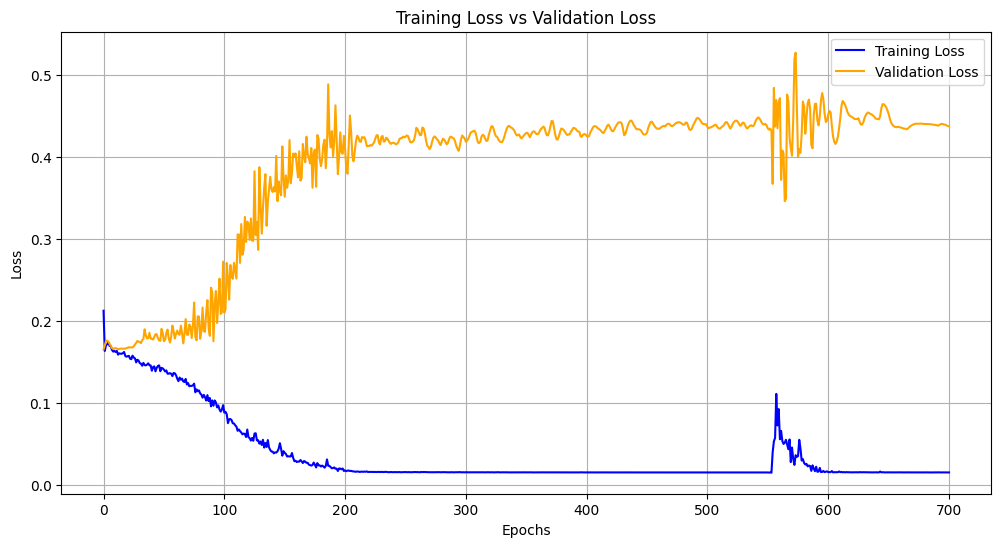

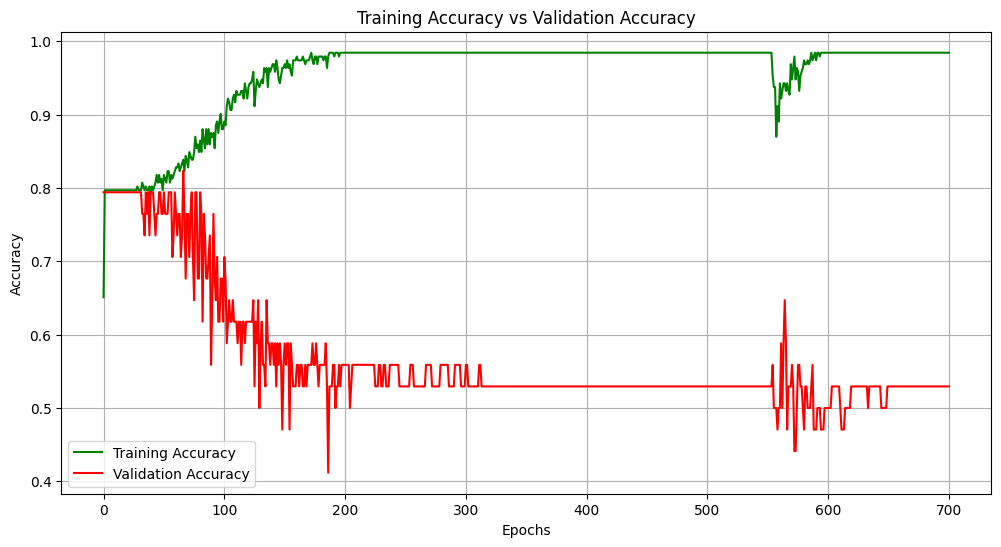

In [39]:
# # Extract the metrics from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
r_square = history.history['accuracy']
val_r_square = history.history['val_accuracy']

# Plot loss and val_loss
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot r_square and val_r_square
plt.figure(figsize=(12, 6))
plt.plot(r_square, label='Training Accuracy', color='green')
plt.plot(val_r_square, label='Validation Accuracy', color='red')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [40]:
# Find the minimum loss for training and validation
min_training_loss = min(loss)
min_validation_loss = min(val_loss)

# Print the results
print(f"Minimum Training Loss: {min_training_loss}")
print(f"Minimum Validation Loss: {min_validation_loss}")

Minimum Training Loss: 0.015311487950384617
Minimum Validation Loss: 0.16572678089141846


In [41]:
# # Find the maximum R² values for training and validation
# max_r_square_train = max(r_square)
# max_r_square_val = max(val_r_square)

# # Print the results
# print(f"Maximum Training R²: {max_r_square_train}")
# print(f"Maximum Validation R²: {max_r_square_val}")

In [42]:
# model = best_model

6/6 [==============================] - 1s 6ms/step


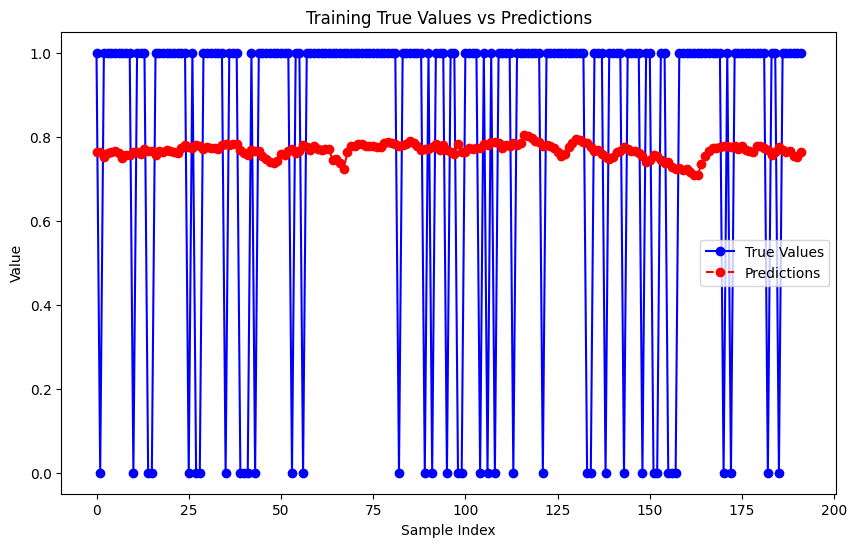

In [43]:
# Generate predictions for the training set
Y_train_pred = model.predict(X_train)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_train, label='True Values', color='blue',  marker='o')
plt.plot(Y_train_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Training True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

2/2 [==============================] - 1s 16ms/step


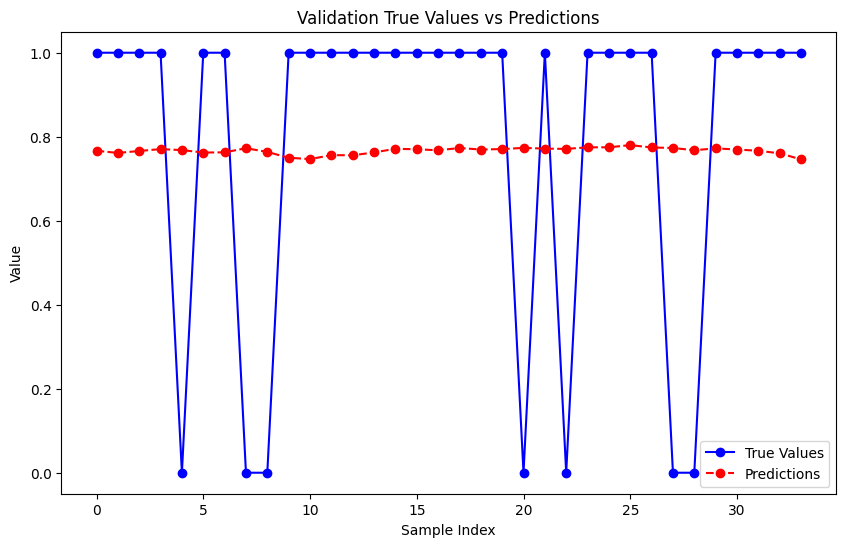

In [44]:
# Generate predictions for the validation set
Y_val_pred = model.predict(X_val)

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_val, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

2/2 [==============================] - 0s 12ms/step


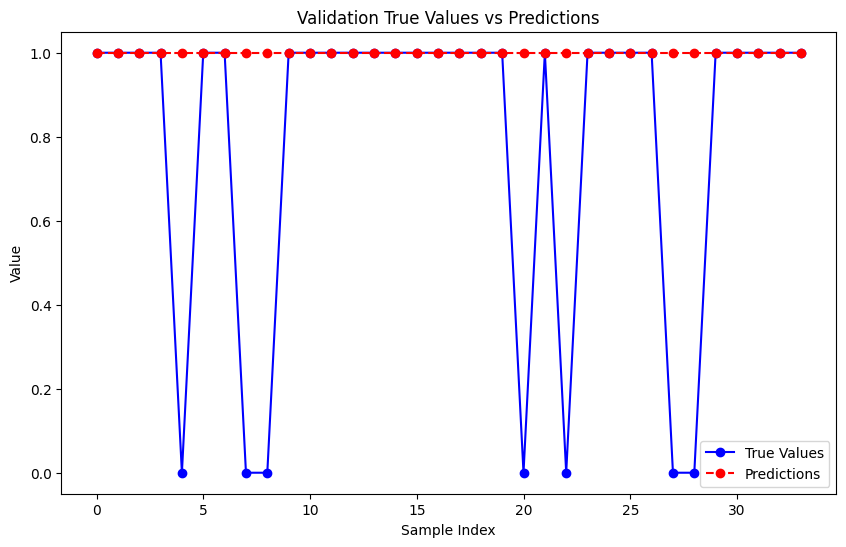

In [45]:
# Generate predictions for the validation set
Y_val_pred = model.predict(X_val)
Y_val_pred = np.where(Y_val_pred > 0.5, 1,np.where(Y_val_pred<-0.5, -1, 0) )

# Plot the true values and predictions
plt.figure(figsize=(10, 6))
plt.plot(Y_val, label='True Values', color='blue', marker='o')
plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
plt.title('Validation True Values vs Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix

# Create confusion matrix
conf_matrix = confusion_matrix(Y_val.flatten(), Y_val_pred.flatten())

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 0  7]
 [ 0 27]]


In [47]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate predictions for the validation set
# Y_val_pred = model.predict(X_val)
# Y_val_pred = np.where(Y_val_pred > 0.5, 1, np.where(Y_val_pred < -0.5, -1, 0))

# # Plot
# plt.figure(figsize=(12, 6))

# # Add soft gray vertical lines for each sample
# for i in range(len(Y_val)):
#     plt.axvline(x=i, color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# # Plot true values and predictions as scatter
# plt.scatter(range(len(Y_val)), Y_val, label='True Values', color='blue', marker='o')
# plt.scatter(range(len(Y_val_pred)), Y_val_pred, label='Predictions', color='red', marker='o')

# # Styling
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(False)  # Remove default grid
# plt.tight_layout()
# plt.show()


In [48]:
# Calculate total accuracy
total_accuracy = np.sum(Y_val.flatten() == Y_val_pred.flatten()) / len(Y_val)
print(f"Total Accuracy: {total_accuracy * 100:.2f}%")

Total Accuracy: 79.41%


In [49]:
# # Generate predictions for the validation set
# Y_val_pred = model.predict(X_test_filtered)
# Y_val_pred = np.where(Y_val_pred > 0.42, 1, -1)

# # Plot the true values and predictions
# plt.figure(figsize=(10, 6))
# plt.plot(Y_test_filtered, label='True Values', color='blue', marker='o')
# plt.plot(Y_val_pred, label='Predictions', color='red', linestyle='dashed', marker='o')
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.show()

In [50]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate predictions for the validation set
# Y_val_pred = model.predict(X_test_filtered)
# Y_val_pred = np.where(Y_val_pred > 0.2, 1, -1)

# # Plot the true values and predictions
# plt.figure(figsize=(12, 6))

# # Add soft gray vertical lines for each sample index
# for i in range(len(Y_test_filtered)):
#     plt.axvline(x=i, color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

# # Plot using scatter (no connecting lines)
# plt.scatter(range(len(Y_test_filtered)), Y_test_filtered, label='True Values', color='blue', marker='o')
# plt.scatter(range(len(Y_val_pred)), Y_val_pred, label='Predictions', color='red', marker='o')

# # Labels and title
# plt.title('Validation True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(False)
# plt.tight_layout()
# plt.show()


In [51]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Generate predictions for the validation set
# Y_val_pred = model.predict(X_test_filtered)
# Y_val_pred = np.where(Y_val_pred > 0.42, 1, -1)

# # Flatten if needed
# Y_val_pred = Y_val_pred.flatten()
# Y_test_filtered = Y_test_filtered.flatten()

# # Prepare index and classification of correctness
# indices = np.arange(len(Y_test_filtered))
# correct = Y_val_pred == Y_test_filtered
# incorrect = ~correct

# # Plot the figure
# plt.figure(figsize=(12, 6))

# # Add vertical gray lines
# for i in range(len(Y_test_filtered)):
#     plt.axvline(x=i, color='gray', linestyle='-', linewidth=0.7, alpha=0.7)

# # Plot true values as reference shadow
# # plt.scatter(indices, Y_test_filtered, color='blue', label='True Value (Reference)', marker='o', alpha=0.3)

# # Plot correct predictions (overlapping with true values)
# plt.scatter(indices[correct], Y_val_pred[correct], color='blue', marker='o', label='Correct Prediction')

# # Plot incorrect predictions
# plt.scatter(indices[incorrect], Y_val_pred[incorrect], color='red', marker='o', label='Incorrect Prediction')

# # Labels and title
# plt.title('Testing True Values vs Predictions')
# plt.xlabel('Sample Index')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(False)
# plt.tight_layout()
# plt.show()


In [52]:
# from sklearn.metrics import confusion_matrix

# # Create confusion matrix
# conf_matrix = confusion_matrix(Y_test_filtered.flatten(), Y_val_pred.flatten())

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)

In [53]:
# # Calculate total accuracy
# total_accuracy = np.sum(Y_test_filtered.flatten() == Y_val_pred.flatten()) / len(Y_test_filtered)
# print(f"Total Accuracy: {total_accuracy * 100:.2f}%")